![1](ATLASOD.gif)

## Antra pamoka

Šioje pamokoje mes:
* Tęsime ATLAS atvirų duomenų analizę
* Palyginsime simuliaciją su tikrais protonų susidūrimų duomenimis
* Atliksime duomenų glotninimo pratimą, kad išmatuoti Z bozono masę ir pusamžį

## Kodėl reikia simuliacijos?
Dalelių fizikoje dažnai duomenys lyginami su simuliacija. Tai daroma tam, kad įsitikinti ar gerai suprantame detektorių ir kad tikrai stebime tam tikrą fizikinį procesą. Simuliacija yra neišvengiama ir atliekant naujų fizikinių procesų paiešką, bandant įsivaizduoti, kokį pėdsaką detektoriuje paliktų naujos (hipotetinės) dalelės.

In [ ]:
import ROOT
%jsroot on
ROOT.gStyle.SetOptStat(0) # panaikina histogramos statistikos dėžę
from PlotStyle import setStyle # ATLAS grafikų stiliaus failas
setStyle()

In [ ]:
# Šį kartą analizuosime ir palyginsime tikrus duomenis su simuliacija! 
# Tam atidaromi du failai
duom_failas = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/Data/data_A.2lep.root")
sim_failas = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_363356.ZqqZll.2lep.root")

In [ ]:
# Kad nekartoti to paties skaičiavimo abiems failams, įvedame funkciją
def gauti_masės_histogramą(failas, pavadinimas, n_įvykių, 
                           intervalai=100, min_masė=5, max_masė=130):
    print(f"Skaitome {n_įvykių} įvykių iš failo {failas.GetName()}")
    medis = failas.Get("mini")
    
    masės_histograma = ROOT.TH1D(pavadinimas, 
                                 "; leptonų sistemos masė [GeV]; įvykių skaičius",
                                 intervalai, min_masė, max_masė)

    # Pastorinkime histogramą kad aiškiau matytųsi grafike
    masės_histograma.SetLineWidth(2)

    # Kaip ir pirmojo pamokoje, apskaičiuojame masę
    pirmas_leptonas = ROOT.TLorentzVector()
    antras_leptonas = ROOT.TLorentzVector()

    n = 0
    for įvykis in medis:
        if įvykis.lep_n < 2:
            continue

        # Leptonų krūviai privalo būti skirtingi
        if (įvykis.lep_charge[0] == įvykis.lep_charge[1]):
            continue 

        # Analizuojame tik Z->mumu kanalą
        if (abs(įvykis.lep_type[0]) == 13 and abs(įvykis.lep_type[1]) == 13):

            pirmo_pt = įvykis.lep_pt[0]/1000.
            antro_pt = įvykis.lep_pt[1]/1000.
            pirmo_E = įvykis.lep_E[0]/1000.
            antro_E = įvykis.lep_E[1]/1000.
            pirmo_phi = įvykis.lep_phi[0]
            antro_phi = įvykis.lep_phi[1]
            pirmo_eta = įvykis.lep_eta[0]
            antro_eta = įvykis.lep_eta[1]

            pirmas_leptonas.SetPtEtaPhiE(pirmo_pt, pirmo_eta, pirmo_phi, pirmo_E)
            antras_leptonas.SetPtEtaPhiE(antro_pt, antro_eta, antro_phi, antro_E)

            sistema = pirmas_leptonas + antras_leptonas
            masė = sistema.M()

            masės_histograma.Fill(masė)
            n += 1
            if n == n_įvykių:
                break

    # Grąžiname histogramą naudotojui
    return masės_histograma

In [ ]:
# Norime dviejų histogramų, vienos tikriems duomenims ir kitos simuliuotiems.
n_įvykių = 100000

# Pasinaudojame funkcija, kad nesikartoti
duom_histograma = gauti_masės_histogramą(duom_failas, "duomenys", n_įvykių)
sim_histograma = gauti_masės_histogramą(sim_failas, "simuliacija", n_įvykių)

# Pastaba: jeigu per lėtai kraunami failai, sumažinkite įvykių skaičių

In [ ]:
drobė = ROOT.TCanvas()
drobė.Draw()

# Sekanti eilutė sutalpina abi histogramas į tą patį grafiką
duom_histograma.SetMaximum(1.3*max(duom_histograma.GetMaximum(), 
                              sim_histograma.GetMaximum()))

# Pakeičiame histogramos savybes gražesniam grafikui
duom_histograma.SetLineColor(ROOT.kBlack)
duom_histograma.SetMarkerStyle(20)
duom_histograma.SetMarkerSize(0.6)
duom_histograma.SetMarkerColor(ROOT.kBlack)
sim_histograma.SetLineColor(ROOT.kBlue)

# Piešiame duomenų histogramą
duom_histograma.Draw("PE") 

# Piešiame simuliacijos histogramą
# PE = point + error = taškai su paklaidomis
sim_histograma.Draw("SAME")

# Sukuriame legendą
legenda = ROOT.TLegend(0.2, 0.65, 0.5, 0.8)

# Pridedame abu grafikus į legendą
legenda.AddEntry(duom_histograma, "duomenys", "P")
legenda.AddEntry(sim_histograma, "simulacija", "L")

# Piešiame legendą
legenda.Draw()

Iš pirmo žvilgsnio, histogramos gerai sutampa. Kadangi turime stiprų rezonansą, sunku pastebėti kas vyksta už jo ribų. Dėl to verta nubrėžti tą patį grafiką su logaritmine ašimi

In [ ]:
# Nupieškime šį patį grafiką su logaritmine y ašimi
drobė_log = ROOT.TCanvas()
drobė_log.SetLogy()
duom_histograma.Draw("PE") 
sim_histograma.Draw("SAME")
drobė_log.Draw("")
legenda.Draw()

## Grafiko interpretacija

Matome, kad simuliuotas spektras gana gerai atitinka tikrus duomenis, taigi galime būti tikri, kad protonų susidūrimų duomenyse egzistuoja Z bozono rezonansas! 

Mūsų naudota simuliacija modeliuoja tik tam tikrą procesą (rezonansą), šiuo atveju $Z\to \mu\mu$. Ar pastebėjote antrą rezonansą 9 GeV aplinkoje, kurio neaprašo simuliuoti duomenys? Šis rezonansas yra sudarytas iš kažkokios dalelės-antidalelės poros.

_Klausimas:_ Iš kokių __fundamentalių__ dalelių galėtų būti sudarytas šis rezonansas?

## Duomenų glotninimas

Bandysime iš histogramos išgauti Z bozono masę glotninimo pagalba. Duomenų glotninimas (angl. _fitting_) - bandymas surasti duotos funkcijos parametrus, kurie geriausiai atspindi matomus duomenis. Funkcinę formą turime pasirinkti patys. Iš pradžių pabandysime Gauso (normalųjį) skirstinį, kuris labai dažnai taikomas praktikoje ir atitinka daugybę žinomų reiškinių gamtoje. Skirstinys apibūdinamas vidurkiu, $\mu$ ir standartiniu nuokrypiu, $\sigma$. Kadangi histograma nėra normalizuota (rodomas absoliutus Z bozonų įvykių skaičius, o ne tikimybė), dar prireiks ir amplitudės.
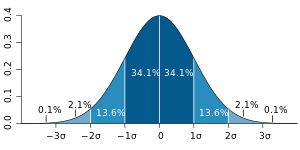

In [ ]:
# Toliau dirbame tik su tikrais (o ne simuliuotais) susidūrimų duomenimis
histograma = gauti_masės_histogramą(duom_failas, "duomenys", 100000, intervalai=50, min_masė=70, max_masė=110)

In [ ]:
glotninimo_drobė = ROOT.TCanvas()
glotninimo_drobė.Draw()

# Sukuriame fukciją (F) vienoje (1) dimensijoje su pavadinimu "gausas"
# Ši funkcija bus naudojama glotninimui
funkcija = ROOT.TF1("gausas", "gaus")

# Pakeiskime parametrų pavadinimus:
funkcija.SetParNames("Amplitudė", "Vidurkis", "Standartinis nuokrypis")
print("Naudojama glotninimo funkcija:", funkcija.GetFormula().GetExpFormula())
print()

# Grafiko pagražinimai
histograma.GetXaxis().SetTitleSize(0.05)
histograma.GetYaxis().SetTitleSize(0.05)
histograma.GetXaxis().SetTitleOffset(1.5)
histograma.GetYaxis().SetTitleOffset(1.5)


# Kad glotninimas vyktų sklandžiau, verta "spėti" pradinius funkcijos parametrus
funkcija.SetParameter(0, 10000) # amplitudė
funkcija.SetParameter(1, 90) # vidurkis
funkcija.SetParameter(2, 10) # sandartinis nuokrypis
funkcija.SetLineColor(ROOT.kRed)

# Atliekame funkcijos glotninimą prie duomenų
histograma.Fit("gausas", "E", "ESAME")

# Pabandykime pakeisti funkciją aprašyti rezonansą
# Pridėkime tiesinę funkciją ir konstantą prie Gauso skirstinio
funkcija2 = ROOT.TF1("funkcija", "gausas + [0] + [1]*x")
funkcija2.SetParName(0, "Konstanta")
funkcija2.SetParName(1, "Tiesės koeficientas")
funkcija2.SetLineColor(ROOT.kOrange)
print("Naudojama antra glotninimo funkcija:", funkcija2.GetFormula().GetExpFormula())
print()

histograma.Fit("funkcija", "E+", "ESAME") # pliusas reikalingas kad neištrinti praeitos funkcijos 

# Sukurkime grafiko legendą
legenda = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legenda.AddEntry(histograma, "Duomenys", "P")
legenda.AddEntry(funkcija, "Gausas", "L")
legenda.AddEntry(funkcija2, "Gausas + tiesė", "L")
legenda.Draw("")

# Užrašykime gautą rezultatą ant drobės
tekstas_nma = ROOT.TText(0.18, 0.8, "NMA ATLAS Atvirų duomenų analizė")
tekstas_nma.SetTextSize(13)
tekstas_nma.SetNDC()
tekstas_nma.Draw()

vidurkis = funkcija2.GetParameter("Vidurkis")
tekstas_glautninimas = ROOT.TText(0.18, 0.6, f"rasta Z bozono masė: {vidurkis:.2f} GeV")
tekstas_glautninimas.SetTextSize(13)
tekstas_glautninimas.SetNDC()
tekstas_glautninimas.Draw()

Matome, kad Gauso skirstinys visai neprastai atspindi Z bozono rezonansinį masės spektrą.

## Užduotys ir klausimai:

Duomenų glotninimas labai dažnai naudojamas dalelių fizikos statistinė analizėje aprašant dalelių rezonansus.

* Paieškokite internete, kokia išmatuota Z bozono masė. Kodėl mūsų gautas rezultatas galėtų skirtis?
* Apskaičiuokite glotninimo būdu ne tik rezonanso centrą, bet ir jo storį, $\Gamma$. Apskaičiuokite dalelės gyvavimo trukmę (pusamžį) pasinaudodami formule $\tau=\hbar/\Gamma$. Galite pasinaudoti $\hbar = 6.6 \times 10^{-16}~~\mathrm{eVs}$. Palyginkite savo gautą rezultatą su oficialiai išmatuotu. (Komentaras: Z bozonas gali skilti ir į kitas daleles, kad tiksliai apskaičiuoti pilną pusamžį iš tikrųjų reiktų išmatuoti visus skilimo kanalus, tačiau čia tuo neapsiimsime). Kokį atstumą nukeliautų Z bozonas LHC eksperimente prieš susiskildamas?
* Pakartokite užduotį pasirinkdami elektronų poras vietoj miuonų. Ar glotninimo rezultatai palyginami? Ar to ir tikėjotės?
* Realistiškiau dalelių rezonansus aprašo ne Gauso skirstinys, bet Breito-Wignerio formulė $y = \frac{A}{(x^2-M^2)^2+M^2\Gamma^2}$. Aprašykite šią funkciją patys ir atlikite glotninimą. Ar gauti rezultatai atrodo geriau?  

[<img src="Breit-Wigner.png" width="300"/>](Breit-Wigner.png)  


Daugiau informacijos ROOT puslapyje apie glotninimus: https://root.cern/manual/fitting/ (žiūrėti python instrukcijas)

In [ ]:
# Išgaukite rezonanso storį
Gamma = ... # vienetai: GeV

# ir apskaičiuokite pusamžį bet nukeliautą atstumą
hbar = 6.6e-16 # vienetai: eVs
tau = hbar/Gamma
atstumas = ...

## Papildomo rezonanso analizė (esant laikui/savarankiškai)

Žemiau esančioje celėje sukuriame žemos masės intervalo histogramą, kur $M<15\,\mathrm{GeV}$. Iš tikrųjų, čia matome net tris skirtingas persiklojančias būsenas: $\Upsilon(1S)$ ir sužadintas $\Upsilon(2S)$ ir $\Upsilon(3S)$, kas apsunkina glotninimą.

__Pabandykite glotninimo būdu surasti visų trijų $\Upsilon$ rezonansų masę.__

_Patarimas:_ Kad sukurti naują funkciją, sudarytą iš dviejų skirtingų normalių skirstinių, galima padaryti taip:
```
f1 = ROOT.TF1("f1", "gaus")
f2 = ROOT.TF1("f2", "gaus")
f = ROOT.TF1("suma", "f1+f2")
```

_Patarimas:_ Glotninimas vyks sklandžiau, jeigu išmintingai nurodysite pirmines funkcijos parametrų vertes

In [ ]:
# Įskaitome visus esančius duomenis (-1)
upsilon_histograma = gauti_masės_histogramą(duom_failas, "upsilon", -1, intervalai=100, min_masė=7, max_masė=12)
drobė_upsilon = ROOT.TCanvas()
drobė_upsilon.Draw("")
upsilon_histograma.Draw("PE") 